In [1]:
## Test the functions create_mixed_dataset, load_dataset_classification and custom_collate_fn_classification and the class IrregularMixedDataset
# has to run in the NJODE folder

In [1]:
import torch
import tqdm
import numpy as np
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import os, sys
import pandas as pd
import json
import time
import socket
import matplotlib
import matplotlib.colors
from torch.backends import cudnn
import gc
sys.path.append("../")
try:
    from . import models as models
    from . import data_utils as data_utils
    from ..GRU_ODE_Bayes import models_gru_ode_bayes as models_gru_ode_bayes
except Exception:
    import NJODE.models as models
    import NJODE.data_utils as data_utils
    import GRU_ODE_Bayes.models_gru_ode_bayes as models_gru_ode_bayes
import matplotlib.pyplot as plt
import stock_model as stock_model

In [2]:
#create dataset
hyperparam_vol_0 = {
    'drift': 2., 'volatility': 0, 'mean': 4,
    'speed': 2., 'correlation': 0.5, 'nb_paths': 100, 'nb_steps': 100,
    'S0': 1, 'maturity': 1., 'dimension': 1, 
    'obs_perc': 0.1,
    'scheme': 'euler', 'return_vol': False, 'v0': 1,
}
path,time_id = data_utils.create_mixed_dataset(hyperparam_dict = hyperparam_vol_0, vol1 = 0.8)

In [3]:
#load dataset
dataset = 'BlackScholes-mixed'
data = data_utils.IrregularMixedDataset(model_name=dataset, time_id=time_id)

dl = DataLoader(dataset = data, collate_fn = data_utils.custom_collate_fn_classification,shuffle  = True, batch_size = 2, num_workers = 1)


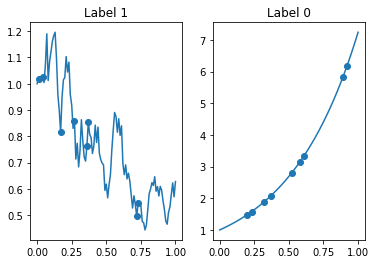

In [7]:
#iterate dataset via batches of size 2
for batch in dl:
    true_X_0 = batch["true_paths"][0,0,:]
    true_X_1 = batch['true_paths'][1,0,:]
    
    observed_dates_0 = batch['observed_dates'][0]
    observed_dates_1 = batch['observed_dates'][1]
    ind_0 = np.nonzero(observed_dates_0)
    ind_1 = np.nonzero(observed_dates_1)

    path_t_true_X = np.linspace(0., 1, 101)

    fig, ax = plt.subplots(1, 2)
    ax[0].plot(path_t_true_X, true_X_0)
    ax[0].set_title('Label '+ str(int(batch['labels'][0])))
    ax[0].scatter(np.linspace(0,1,101)[ind_0[0]],true_X_0[ind_0[0]])
    ax[1].plot(path_t_true_X, true_X_1)
    ax[1].set_title('Label '+ str(int(batch['labels'][1])))
    ax[1].scatter(np.linspace(0,1,101)[ind_1[0]],true_X_1[ind_1[0]])
    

    break
